# Uso de AutoCodificadores imagenes - reducción de dimensiones

## Los Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_entreno, y_entreno), (X_prueba, y_prueba) = mnist.load_data()

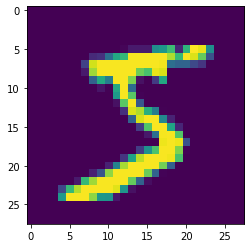

In [4]:
plt.imshow(X_entreno[0])

Se normalizan los datos (escala original 0 - 255)

In [5]:
X_entreno = X_entreno/255
X_prueba = X_prueba/255

## AutoCodificador Básico

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

Es buena idea armar lo que se llama un "AutoCodificador Apilado" en el cual cada capa va rebajando el número de neuronas hasta el número que desee. 

Esto es principalmente para que el aprendizaje pueda ser más escalonado y no intentar que sea de un solo golpe.

Para este ejercicio se irá bajando aproximadamente de mitad en mitad, hasta llegar a una capa de tan solo 25 neuronas.

Esto es totalmente arbirtrario y pueden escogerse otros esquémas

In [7]:
784/2

392.0

In [9]:
codificador = Sequential()
codificador.add(Flatten(input_shape = [28, 28]))
codificador.add(Dense(400, activation = "relu"))
codificador.add(Dense(200, activation = "relu"))
codificador.add(Dense(100, activation = "relu"))
codificador.add(Dense(50, activation = "relu"))
codificador.add(Dense(25, activation = "relu"))

La capa final de codificador es de 25 neuronas,  El decodificador toma esa como entrada y va aumentando hasta llegar a la dimensión correcta.

Como se desea comparar con la imagen original, es necesario cambiar al formato original de 28 X 28

In [10]:
decodificador = Sequential()
decodificador.add(Dense(50, input_shape = [25],
                        activation = 'relu'))
decodificador.add(Dense(100, activation = 'relu'))
decodificador.add(Dense(200, activation = 'relu'))
decodificador.add(Dense(400, activation = 'relu'))
decodificador.add(Dense(784, activation = "sigmoid"))
decodificador.add(Reshape([28, 28]))

Conformar el autocodificador completo.

Se utilza la función de pérdida *binary crossenthropy* porque no interesa obtener clases sino conocer si la imagen resultante es similar a la original.

In [12]:
autocodificador = Sequential([codificador, 
                              decodificador])
autocodificador.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [13]:
autocodificador.fit(X_entreno, X_entreno, 
                    epochs = 5,
                    validation_data=[X_prueba, 
                                     X_prueba])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 262us/sample - loss: 0.2522 - accuracy: 0.7910 - val_loss: 0.2146 - val_accuracy: 0.7952
Epoch 2/5
60000/60000 [==============================] - 14s 239us/sample - loss: 0.1904 - accuracy: 0.7967 - val_loss: 0.1695 - val_accuracy: 0.8013
Epoch 3/5
60000/60000 [==============================] - 14s 232us/sample - loss: 0.1620 - accuracy: 0.8015 - val_loss: 0.1559 - val_accuracy: 0.8051
Epoch 4/5
60000/60000 [==============================] - 14s 238us/sample - loss: 0.1489 - accuracy: 0.8039 - val_loss: 0.1444 - val_accuracy: 0.8062
Epoch 5/5
60000/60000 [==============================] - 14s 235us/sample - loss: 0.1420 - accuracy: 0.8054 - val_loss: 0.1400 - val_accuracy: 0.8025


In [14]:
imagenes_pasadas = autocodificador.predict(X_prueba[:10])

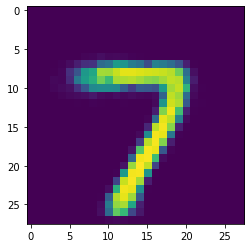

In [15]:
plt.imshow(imagenes_pasadas[0])

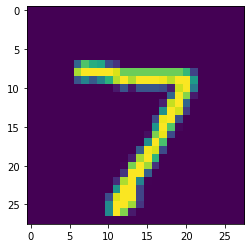

In [16]:
plt.imshow(X_prueba[0])

# AutoCodificadores para reducir el ruido en imágenes

In [17]:
from tensorflow.keras.layers import GaussianNoise

In [18]:
muestra = GaussianNoise(0.2)

In [19]:
ruidosas = muestra(X_prueba[0: 2],
                  training = True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



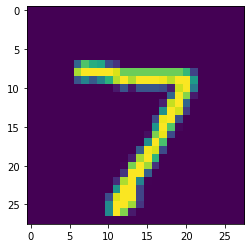

In [20]:
plt.imshow(X_prueba[0])

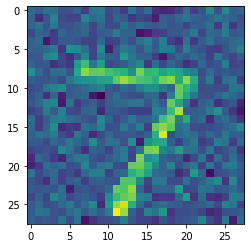

In [21]:
plt.imshow(ruidosas[0])

### Crear autocodificador para eliminación de ruido y entrenarlo.

In [22]:
import tensorflow as tf
import numpy as np

In [23]:
# Esta primera parte es opcional, se usa para crear exactamente el mismo ruido en cada corrida
tf.random.set_seed(101)
np.random.seed(101)


codificador = Sequential()
codificador.add(Flatten(input_shape = [28, 28]))
# Agregar ruido a las imágenes antes de pasarlas por el autocodificador
codificador.add(GaussianNoise(0.2))
codificador.add(Dense(400, activation = "relu"))
codificador.add(Dense(200, activation = "relu"))
codificador.add(Dense(100, activation = "relu"))
codificador.add(Dense(50, activation = "relu"))
codificador.add(Dense(25, activation = "relu"))

In [24]:
decodificador = Sequential()
decodificador.add(Dense(50, input_shape = [25],
                        activation = 'relu'))
decodificador.add(Dense(100, activation = 'relu'))
decodificador.add(Dense(200, activation = 'relu'))
decodificador.add(Dense(400, activation = 'relu'))
decodificador.add(Dense(784, activation = "sigmoid"))
decodificador.add(Reshape([28, 28]))

In [25]:
eliminador_ruido = Sequential([codificador, 
                               decodificador])

In [26]:
eliminador_ruido.compile(loss = "binary_crossentropy", 
                         optimizer = 'adam', 
                         metrics =['accuracy'])

In [27]:
eliminador_ruido.fit(X_entreno, X_entreno, 
                     epochs = 8,
                     validation_data=[X_prueba, X_prueba])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 28s 459us/sample - loss: 0.1712 - accuracy: 0.8010 - val_loss: 0.1321 - val_accuracy: 0.8060
Epoch 2/8
60000/60000 [==============================] - 26s 441us/sample - loss: 0.1302 - accuracy: 0.8078 - val_loss: 0.1218 - val_accuracy: 0.8081
Epoch 3/8
60000/60000 [==============================] - 26s 439us/sample - loss: 0.1225 - accuracy: 0.8092 - val_loss: 0.1155 - val_accuracy: 0.8094
Epoch 4/8
60000/60000 [==============================] - 26s 431us/sample - loss: 0.1172 - accuracy: 0.8102 - val_loss: 0.1110 - val_accuracy: 0.8105
Epoch 5/8
60000/60000 [==============================] - 26s 430us/sample - loss: 0.1133 - accuracy: 0.8108 - val_loss: 0.1081 - val_accuracy: 0.8108
Epoch 6/8
60000/60000 [==============================] - 26s 441us/sample - loss: 0.1105 - accuracy: 0.8113 - val_loss: 0.1059 - val_accuracy: 0.8111
Epoch 7/8
60000/60000 [===========================

In [30]:
diez_imags_con_ruido = muestra(X_prueba[0: 10], 
                                 training = True)
limpias = eliminador_ruido(diez_imags_con_ruido[0: 10])

La Original


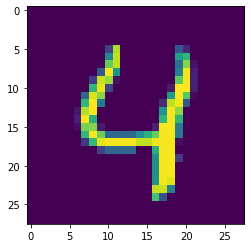

La version con ruido


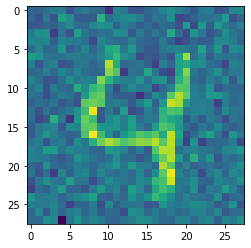

Luego de pasar por el eliminidador de ruido


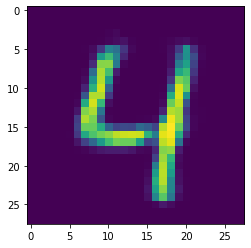

In [32]:
n = 4
print("La Original")
plt.imshow(X_prueba[n])
plt.show()
print("La version con ruido")
plt.imshow(diez_imags_con_ruido[n])
plt.show()
print("Luego de pasar por el eliminidador de ruido")
plt.imshow(limpias[n])
plt.show()